# My inputs

In [1]:
import os
import sys
import pandas as pd
import re
import joblib
from IPython.display import clear_output

# Kernel inputs

In [2]:
import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Models inputs

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

# Initialisation path scripts

In [4]:
path_to_scripts = r'..\02_SCRIPTS'

In [5]:
sys.path.insert(0, path_to_scripts)

# Import functions

In [6]:
from P7_dataprep_function import main

In [7]:
from P7_other_functions import TrainTestGrid, \
    heatmap_print, \
    classify_with_proba

Train samples: 10000, test samples: 10000
Bureau df shape: (2011, 108)
Process bureau and bureau_balance - done in 0s
Previous applications df shape: (9734, 242)
Process previous_applications - done in 0s
Pos-cash balance df shape: (9494, 15)
Process POS-CASH balance - done in 0s
Installments payments df shape: (8893, 26)
Process installments payments - done in 0s
Credit card balance df shape: (9520, 131)
Process credit card balance - done in 0s
Starting LightGBM. Train shape: (10000, 768), test shape: (10000, 768)
Fold  1 AUC : 0.725420
Fold  2 AUC : 0.716144
Fold  3 AUC : 0.709659
Fold  4 AUC : 0.731546
Fold  5 AUC : 0.727236
Fold  6 AUC : 0.739950
Fold  7 AUC : 0.716610
Fold  8 AUC : 0.677266
Fold  9 AUC : 0.720636
Fold 10 AUC : 0.692298
Full AUC score 0.715643


C:\Users\abou-\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Run LightGBM with kfold - done in 316s


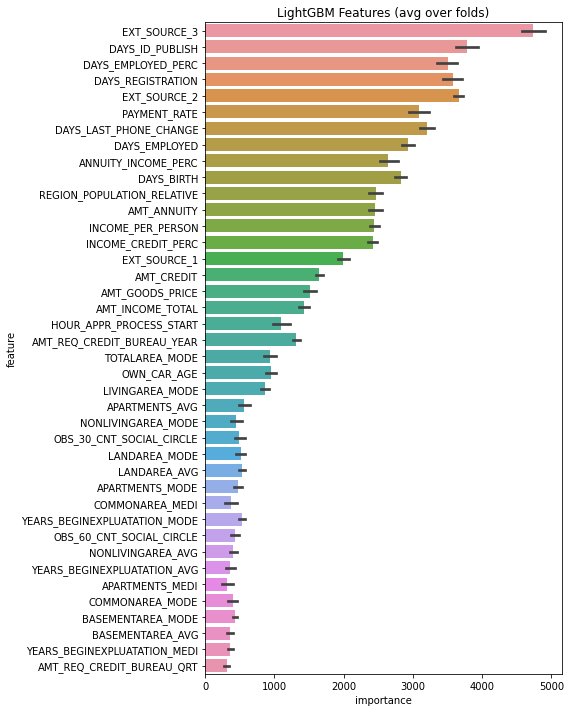

In [8]:
feat_importance, top_feat, df = main(test_importance=True, nrows=10000)

In [9]:
df = main(test_importance=False, nrows=100000)

Train samples: 100000, test samples: 48744
Bureau df shape: (23121, 113)
Process bureau and bureau_balance - done in 1s
Previous applications df shape: (79977, 247)
Process previous_applications - done in 3s
Pos-cash balance df shape: (77469, 15)
Process POS-CASH balance - done in 2s
Installments payments df shape: (48591, 26)
Process installments payments - done in 2s
Credit card balance df shape: (53383, 131)
Process credit card balance - done in 7s


# Univaried analysis

In [10]:
num_rows = 100000

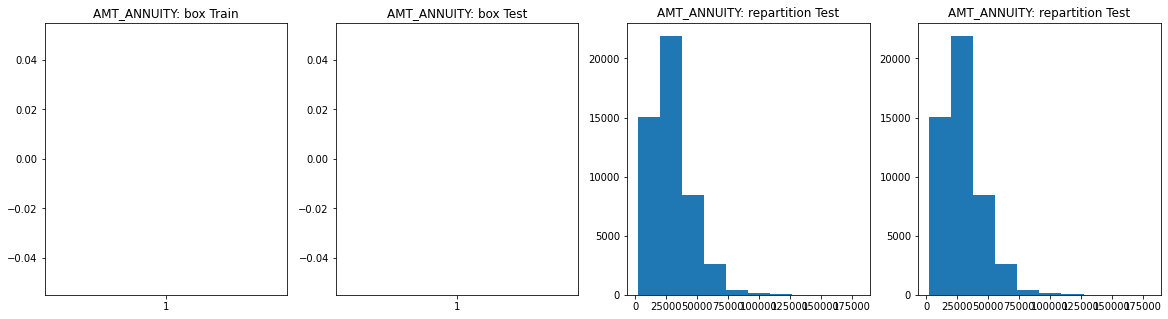

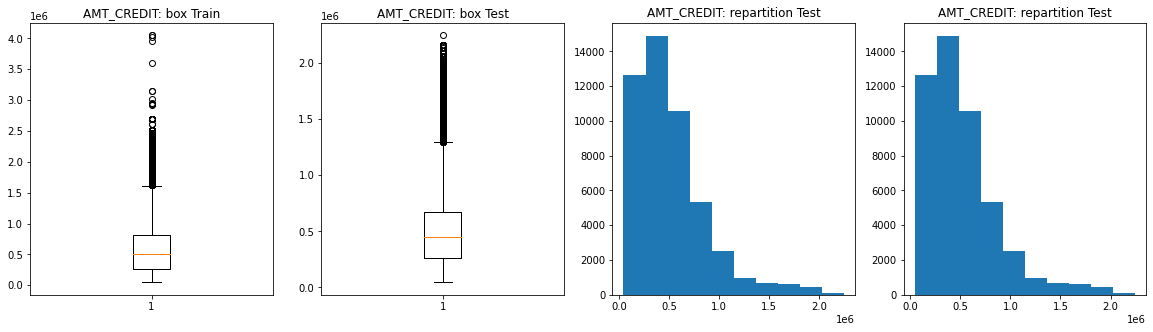

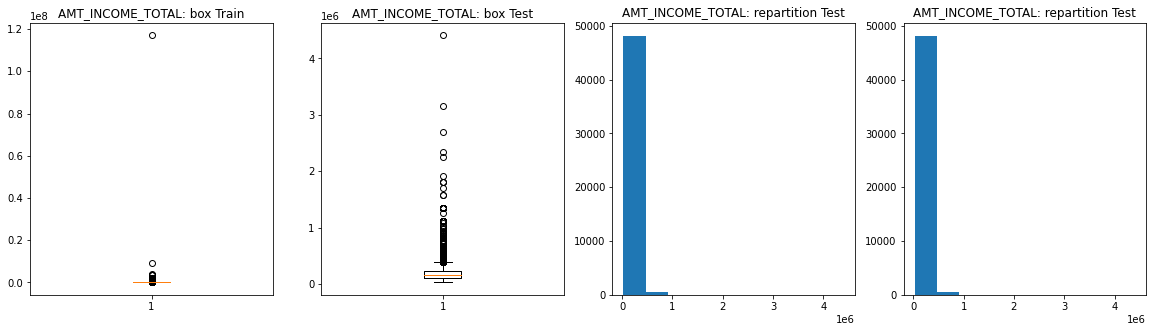

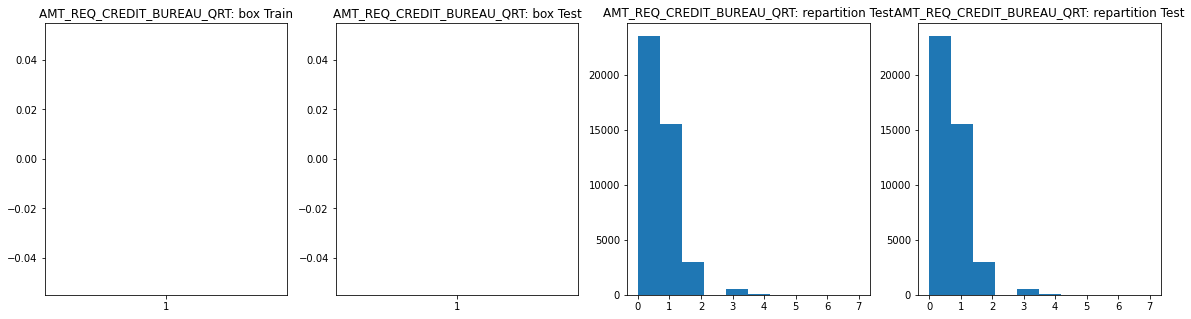

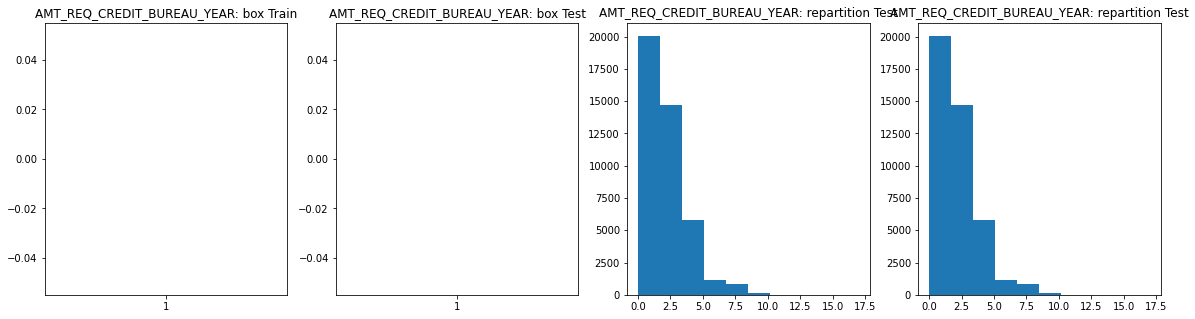

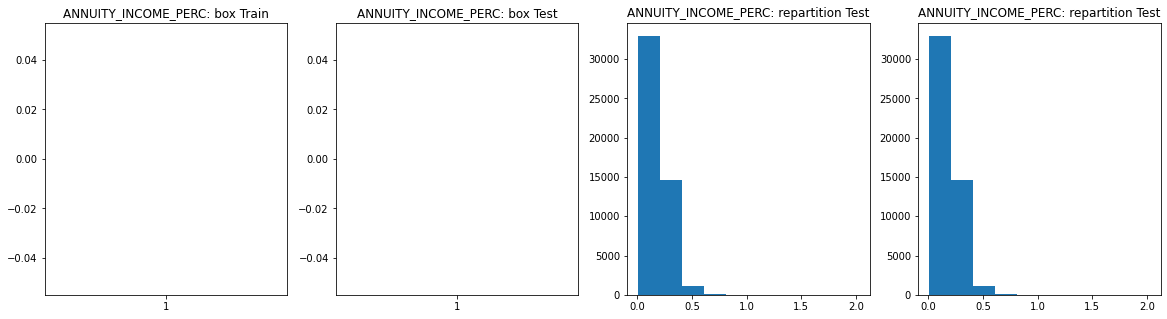

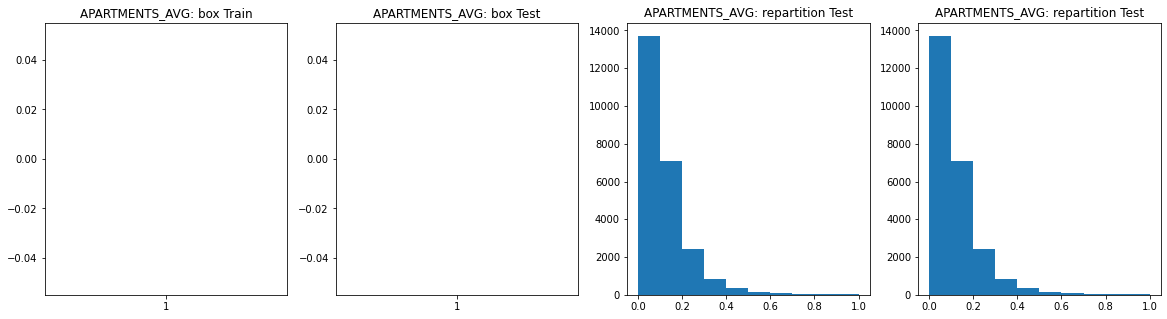

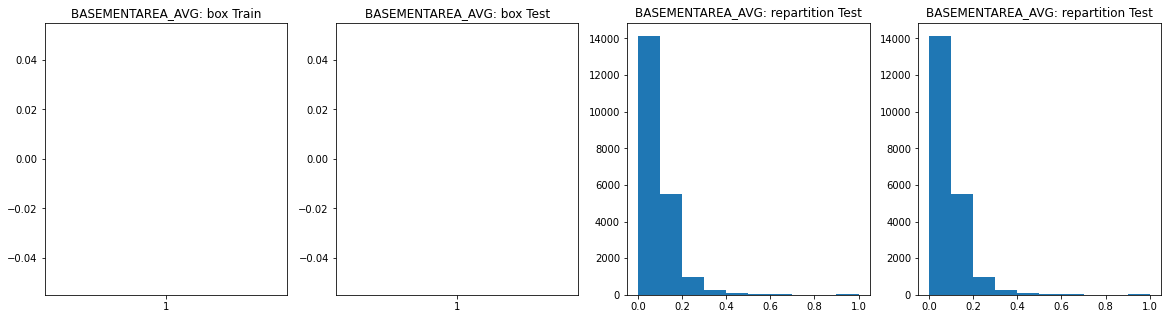

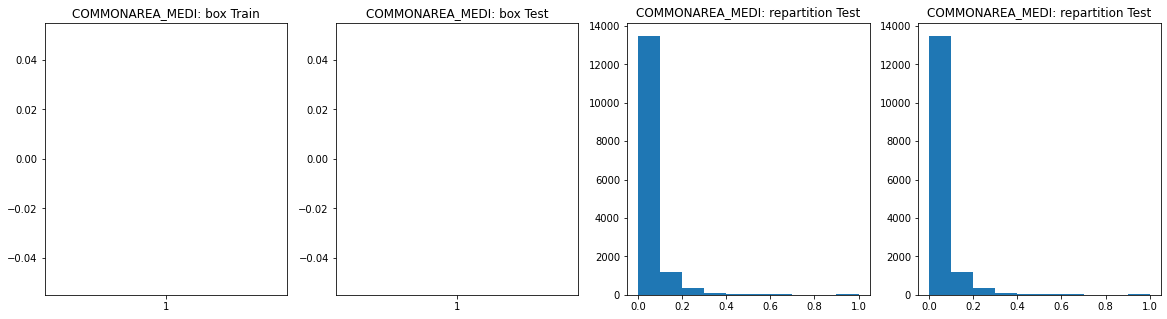

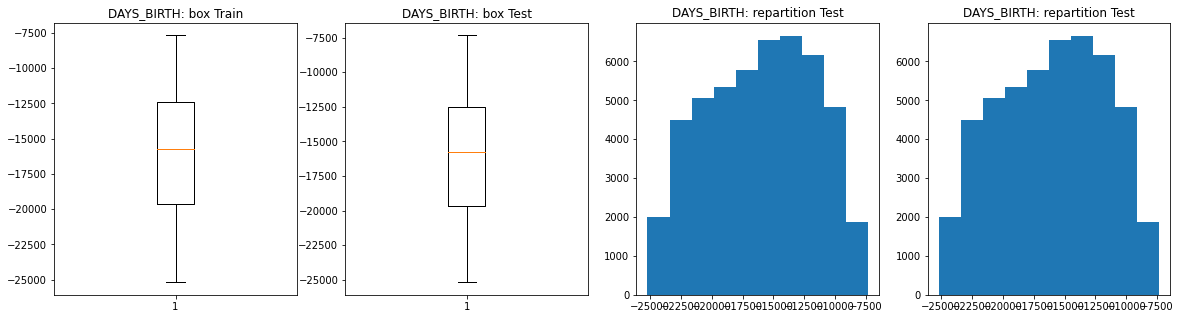

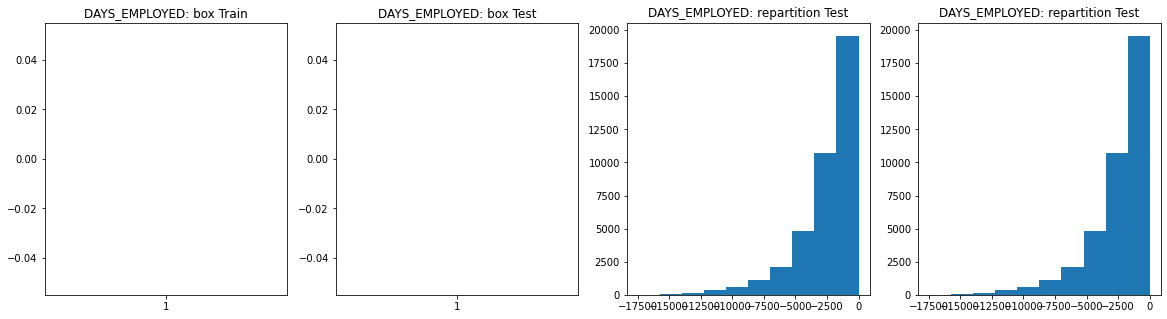

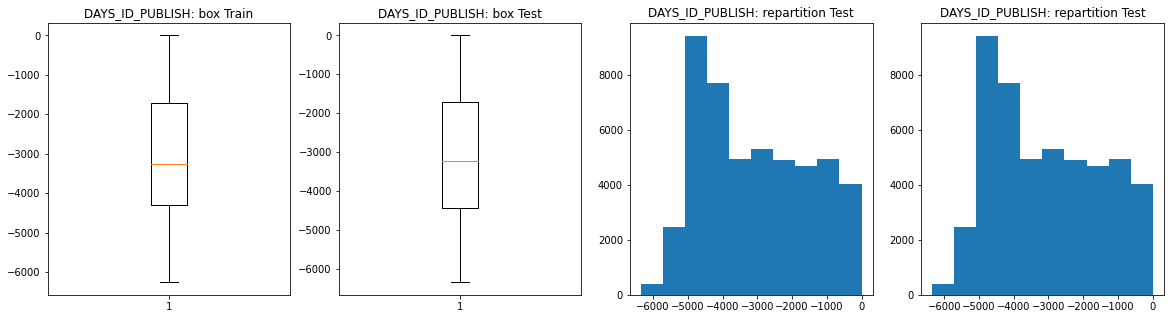

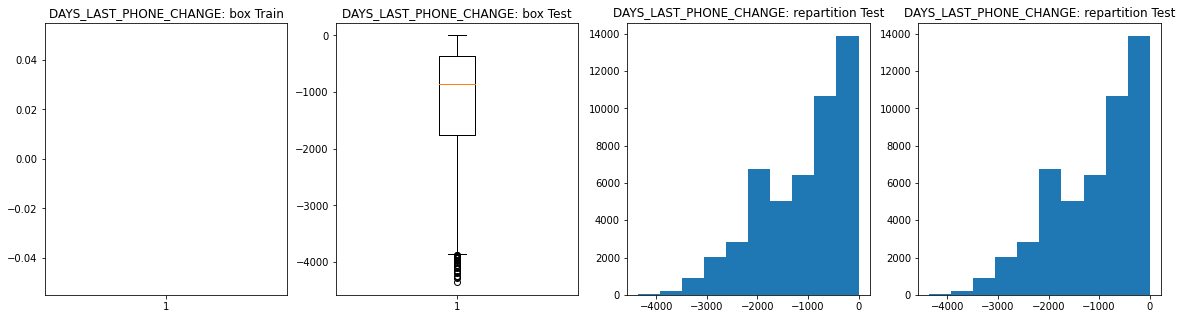

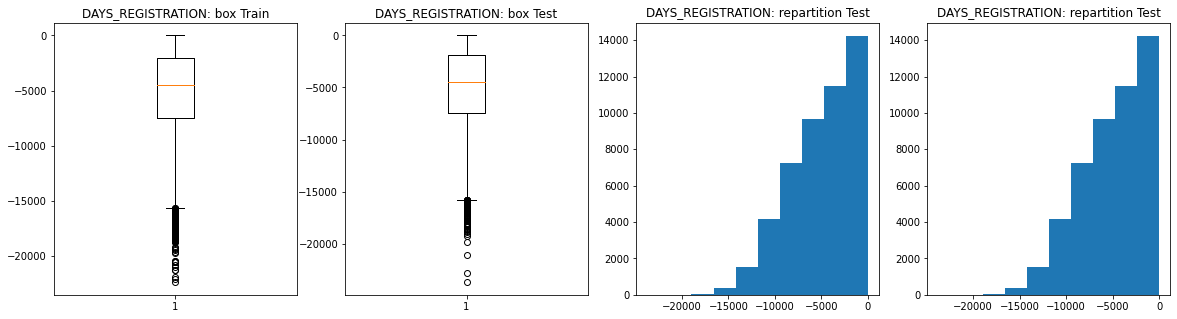

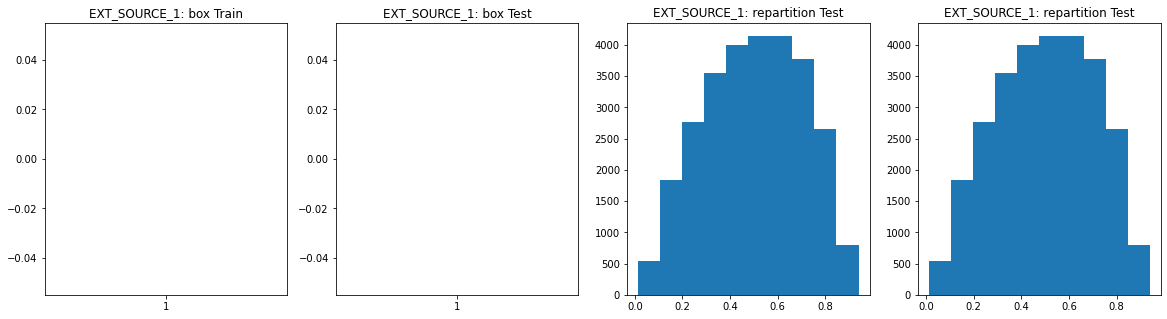

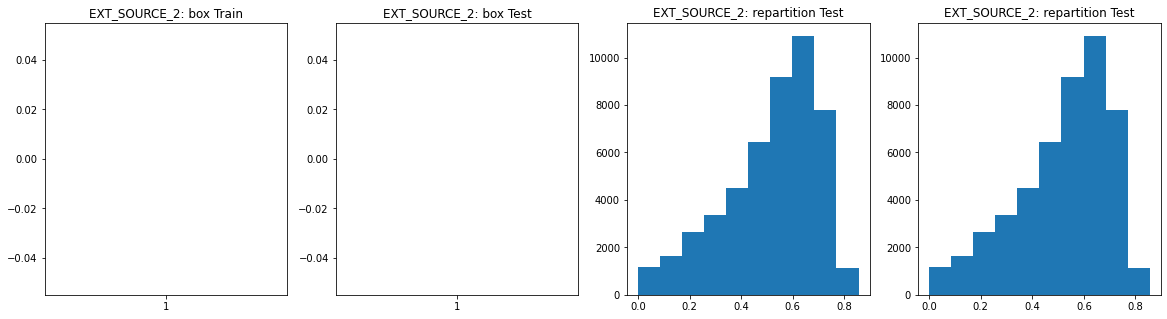

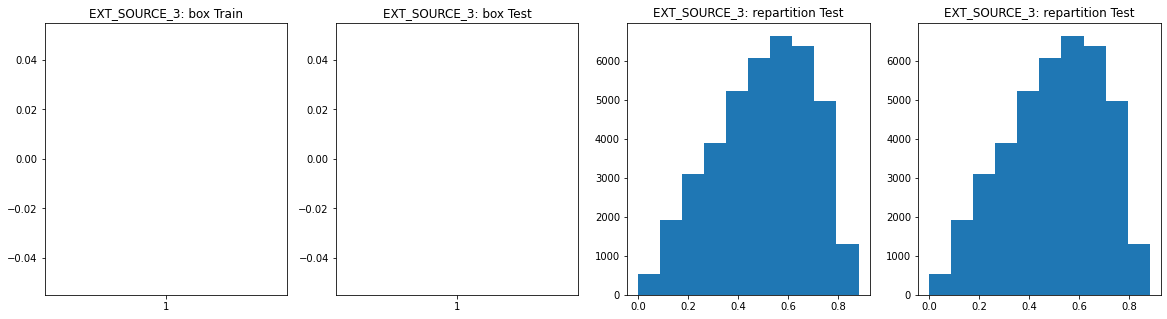

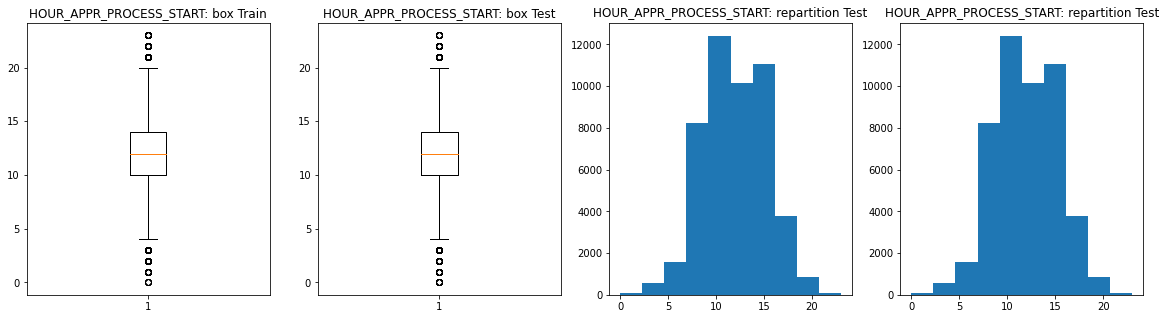

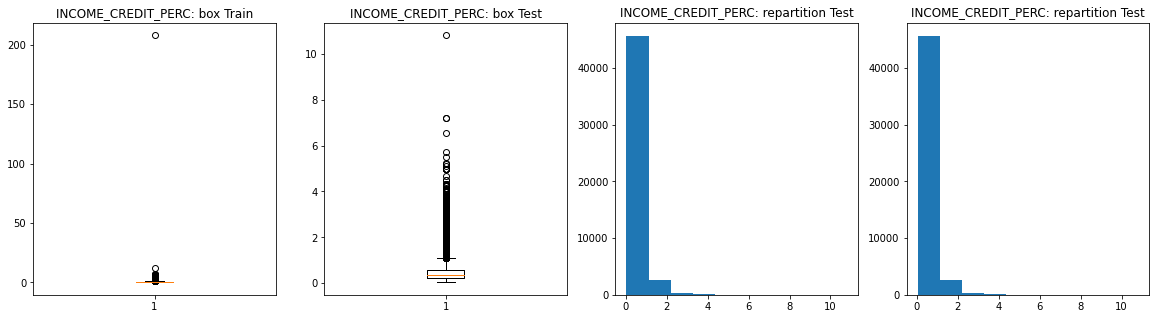

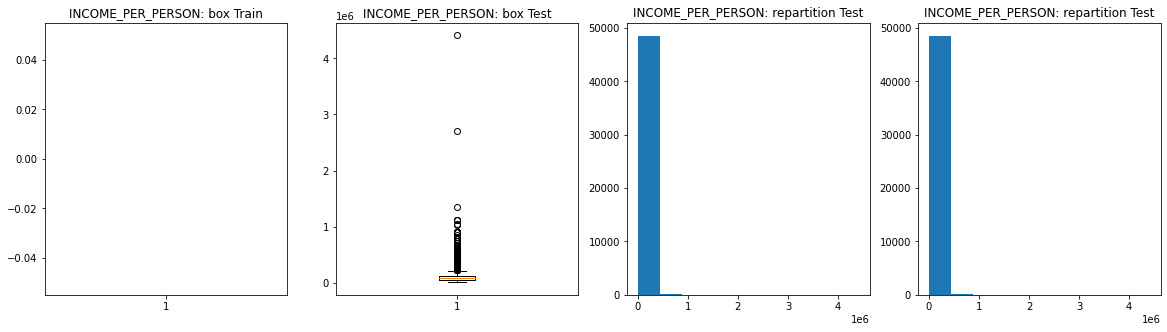

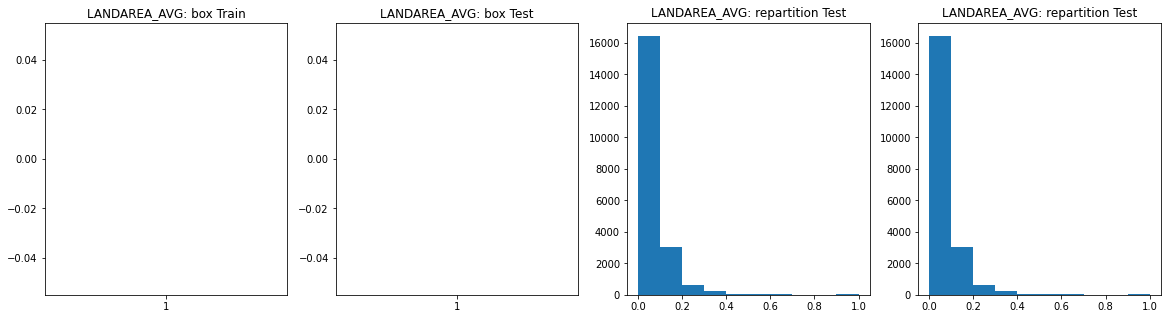

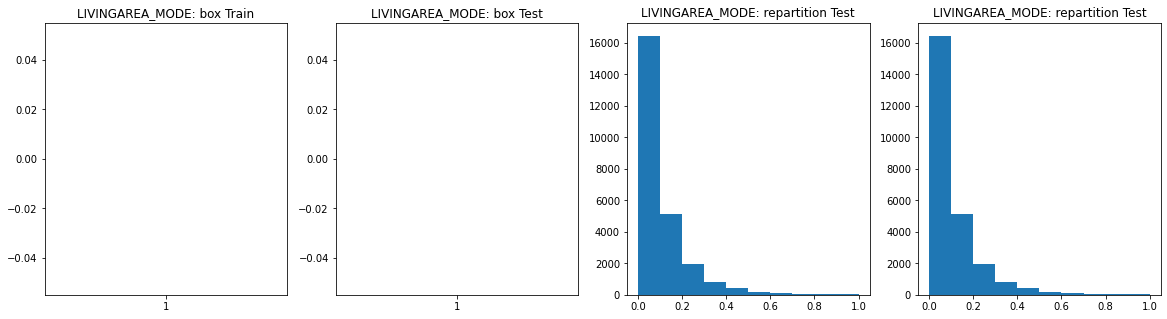

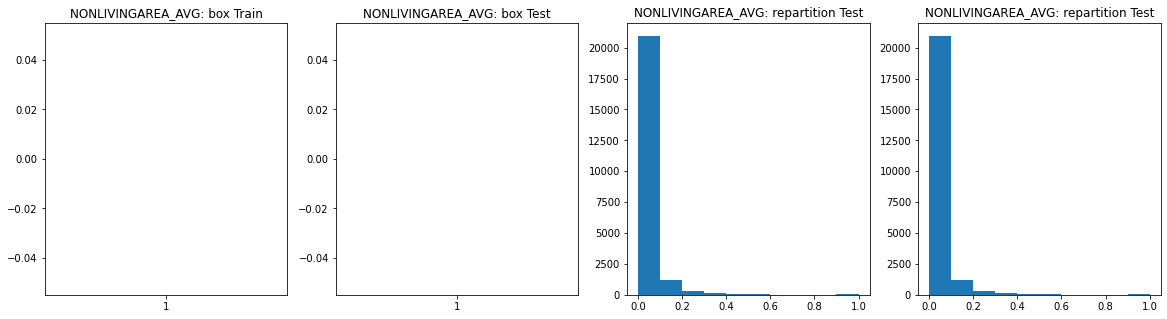

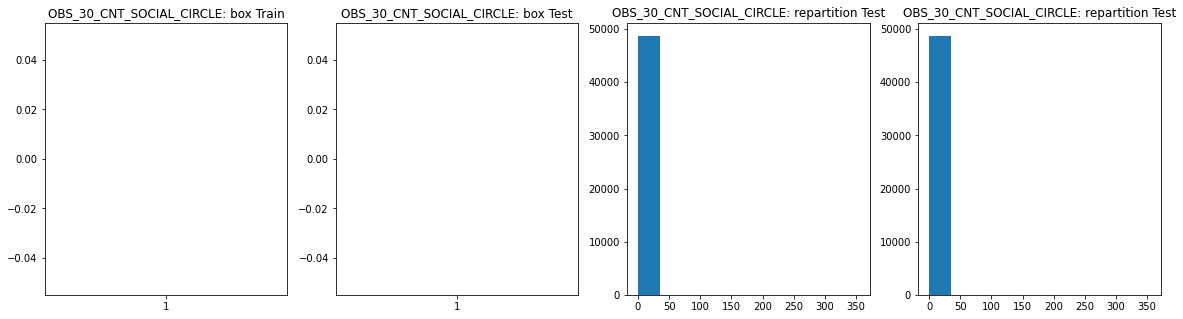

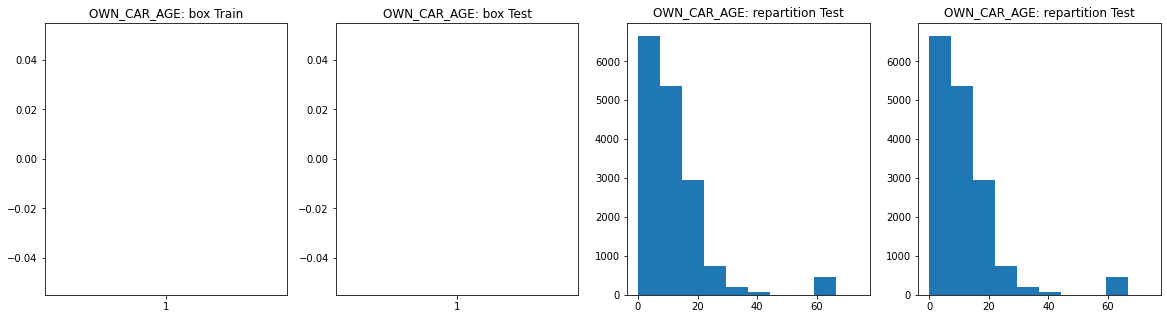

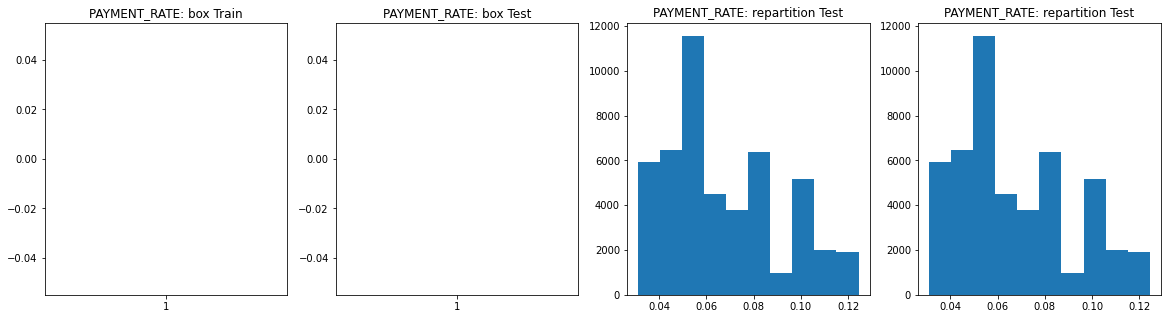

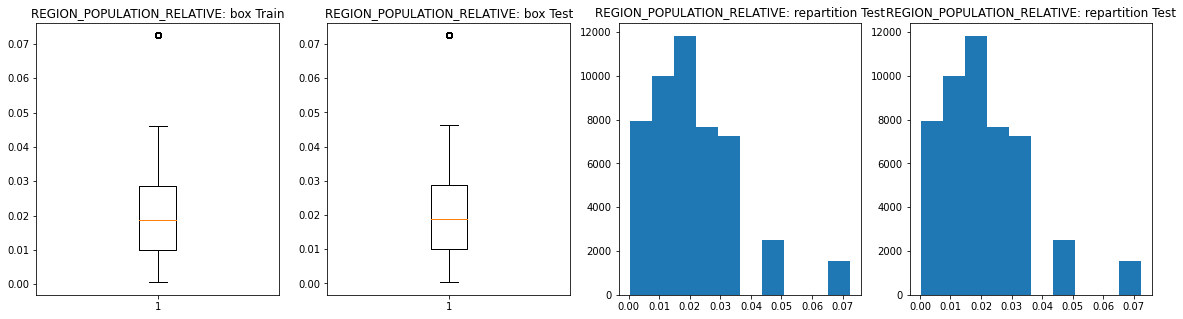

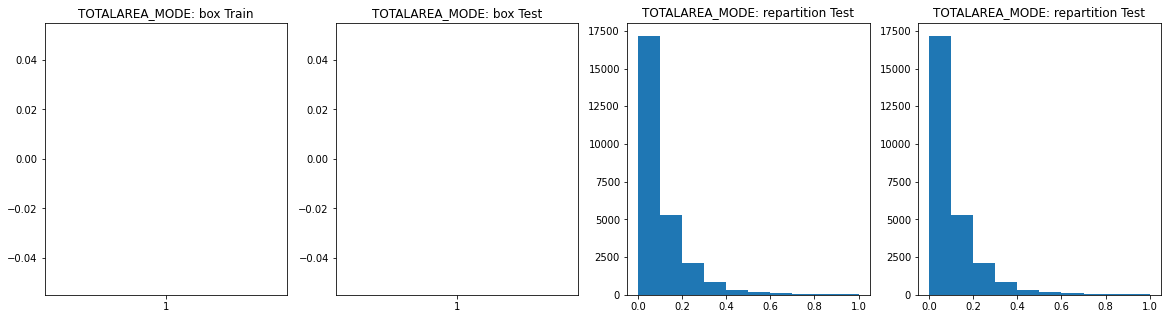

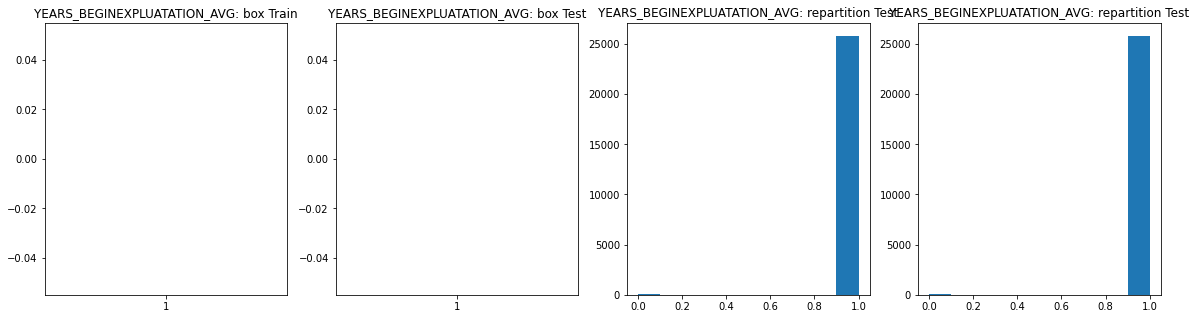

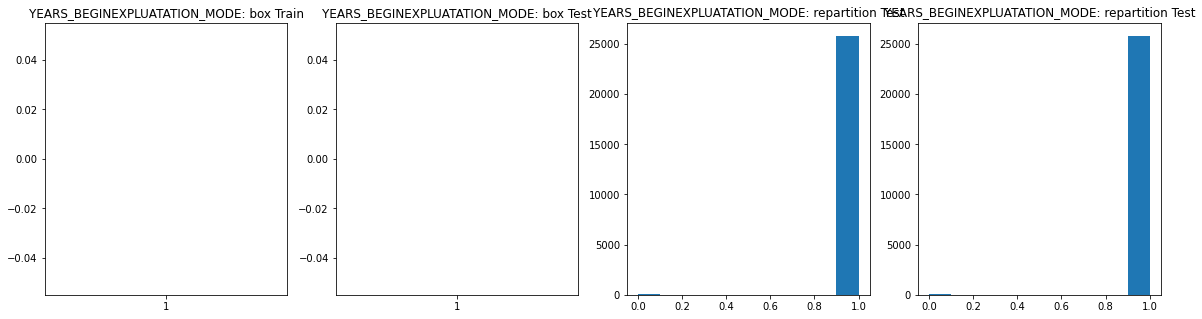

In [11]:
for feat in top_feat:
    plt.figure(figsize=(20,5))
    plt.subplot(1, 4, 1)
    plt.boxplot(df[feat][:num_rows])
    plt.title('{}: box Train'.format(feat))
    plt.subplot(1, 4, 2)
    plt.boxplot(df[feat][num_rows:])
    plt.title('{}: box Test'.format(feat))
    plt.subplot(1, 4, 3)
    plt.hist(df[feat][num_rows:])
    plt.title('{}: repartition Test'.format(feat))
    plt.subplot(1, 4, 4)
    plt.hist(df[feat][num_rows:])
    plt.title('{}: repartition Test'.format(feat))
    plt.show()

In [12]:
top_feat

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'ANNUITY_INCOME_PERC',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'COMMONAREA_MEDI',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'HOUR_APPR_PROCESS_START',
 'INCOME_CREDIT_PERC',
 'INCOME_PER_PERSON',
 'LANDAREA_AVG',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OWN_CAR_AGE',
 'PAYMENT_RATE',
 'REGION_POPULATION_RELATIVE',
 'TOTALAREA_MODE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BEGINEXPLUATATION_MODE']

In [13]:
df_modele = df[top_feat + ['TARGET']]
df_modele

,AMT_ANNUITY,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,ANNUITY_INCOME_PERC,APARTMENTS_AVG,BASEMENTAREA_AVG,COMMONAREA_MEDI,DAYS_BIRTH,...,LIVINGAREA_MODE,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,OWN_CAR_AGE,PAYMENT_RATE,REGION_POPULATION_RELATIVE,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MODE,TARGET
0,24700.5,406597.5,202500.0,0.0,1.0,0.121978,0.0247,0.0369,0.0144,-9461,...,0.0198,0.0000,2.0,NaN,0.060749,0.018801,0.0149,0.9722,0.9722,1.0
1,35698.5,1293502.5,270000.0,0.0,0.0,0.132217,0.0959,0.0529,0.0608,-16765,...,0.0554,0.0098,1.0,NaN,0.027598,0.003541,0.0714,0.9851,0.9851,0.0
2,6750.0,135000.0,67500.0,0.0,0.0,0.100000,NaN,NaN,NaN,-19046,...,NaN,NaN,0.0,26.0,0.050000,0.010032,NaN,NaN,NaN,0.0
3,29686.5,312682.5,135000.0,NaN,NaN,0.219900,NaN,NaN,NaN,-19005,...,NaN,NaN,2.0,NaN,0.094941,0.008019,NaN,NaN,NaN,0.0
4,21865.5,513000.0,121500.0,0.0,0.0,0.179963,NaN,NaN,NaN,-19932,...,NaN,NaN,0.0,NaN,0.042623,0.028663,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148739,17473.5,412560.0,121500.0,0.0,1.0,0.143815,NaN,NaN,NaN,-19970,...,NaN,NaN,1.0,NaN,0.042354,0.002042,NaN,NaN,NaN,NaN
148740,31909.5,622413.0,157500.0,NaN,NaN,0.202600,NaN,NaN,NaN,-11186,...,NaN,NaN,2.0,NaN,0.051267,0.035792,NaN,NaN,NaN,NaN
148741,33205.5,315000.0,202500.0,3.0,1.0,0.163978,0.1113,0.1364,NaN,-15922,...,0.1441,0.0542,0.0,4.0,0.105414,0.026392,0.1663,0.9955,0.9955,NaN
148742,25128.0,450000.0,225000.0,0.0,2.0,0.111680,0.1629,0.0723,NaN,-13968,...,0.1204,0.1490,0.0,NaN,0.055840,0.018850,0.1974,0.9896,0.9896,NaN


In [14]:
df_modele_train = df_modele[df_modele['TARGET'].notnull()]
df_modele_test = df_modele[df_modele['TARGET'].isnull()]

In [15]:
imputer = KNNImputer(n_neighbors=2)
fitted_modele_train = imputer.fit_transform(df_modele_train)
df_modele_train = pd.DataFrame(fitted_modele_train, columns=df_modele.columns)

# Target observations

In [16]:
df_modele_train.TARGET.value_counts()

0.0    91904
1.0     8093
Name: TARGET, dtype: int64

In [17]:
val0 = len(df_modele_train[df_modele_train.TARGET.values == 0])
val1 = len(df_modele_train[df_modele_train.TARGET.values == 1])

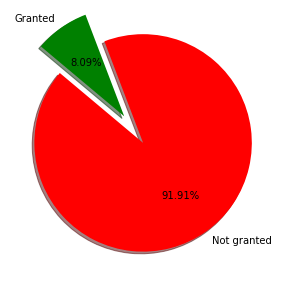

In [18]:
labels = ['Not granted', 'Granted']
values = [val0, val1]
colors = ['red', 'green']
explode = (0, 0.3)
plt.figure(figsize=(10, 5))
plt.pie(values,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct='%.2f%%',
        shadow=True,
        startangle=140)
plt.show()

# Classification
#### KNN, SVC

### Undersampling

In [19]:
#TrainTestGrid(df_modele_train, top_feat, prepro_mthd="under", method='dummy')

In [20]:
#under_lreg_results = TrainTestGrid(df_modele_train, top_feat, prepro_mthd="under", method='lreg')

In [21]:
#under_lgbm_results = TrainTestGrid(df_modele_train, top_feat, prepro_mthd="under", method='lgbm')

In [22]:
#under_rfc_results = TrainTestGrid(df_modele_train, top_feat, prepro_mthd="under", method='rfc')

### Oversampling

In [23]:
#TrainTestGrid(df_modele_train, top_feat, prepro_mthd="over", method='dummy')

In [24]:
#over_lgbm_results = TrainTestGrid(df_modele_train, top_feat, prepro_mthd="over", method='lgbm')

In [25]:
#over_rfc_results = TrainTestGrid(df_modele_train, top_feat, prepro_mthd="over", method='rfc')

### SMOTE

In [26]:
#TrainTestGrid(df_modele_train, top_feat, prepro_mthd="smote", method='dummy')

LGBM train time : 7.493958473205566


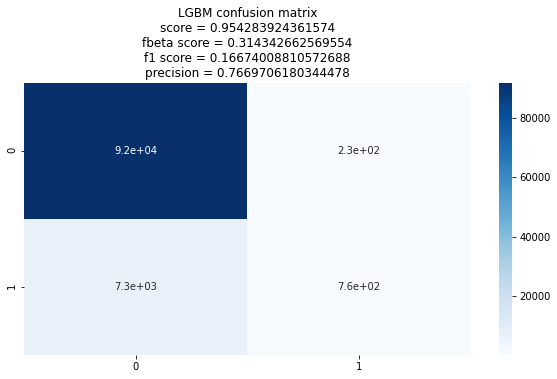

In [29]:
smote_lgbm_results = TrainTestGrid(df_modele_train, top_feat, prepro_mthd="smote", method='lgbm')

In [30]:
#smote_lreg_results = TrainTestGrid(df_modele_train, top_feat, prepro_mthd="smote", method='lreg')

In [31]:
#smote_rfc_results = TrainTestGrid(df_modele_train, top_feat, prepro_mthd="smote", method='rfc')

## Test SGD over entire dataset

In [32]:
df_glo = main(test_importance=False)

Train samples: 307511, test samples: 48744
Bureau df shape: (305811, 116)
Process bureau and bureau_balance - done in 32s
Previous applications df shape: (338857, 249)
Process previous_applications - done in 41s
Pos-cash balance df shape: (337252, 18)
Process POS-CASH balance - done in 21s
Installments payments df shape: (339587, 26)
Process installments payments - done in 50s
Credit card balance df shape: (103558, 141)
Process credit card balance - done in 31s


In [69]:
df_glo_traintest = df_glo.loc[df_glo['TARGET'].notnull()]
df_glo_appli = df_glo.loc[df_glo['TARGET'].isnull()]

In [70]:
df_glo_traintest = df_glo_traintest[top_feat + ['TARGET']]
df_glo_traintest

,AMT_ANNUITY,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,ANNUITY_INCOME_PERC,APARTMENTS_AVG,BASEMENTAREA_AVG,COMMONAREA_MEDI,DAYS_BIRTH,...,LIVINGAREA_MODE,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,OWN_CAR_AGE,PAYMENT_RATE,REGION_POPULATION_RELATIVE,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MODE,TARGET
0,24700.5,406597.5,202500.0,0.0,1.0,0.121978,0.0247,0.0369,0.0144,-9461,...,0.0198,0.0000,2.0,NaN,0.060749,0.018801,0.0149,0.9722,0.9722,1.0
1,35698.5,1293502.5,270000.0,0.0,0.0,0.132217,0.0959,0.0529,0.0608,-16765,...,0.0554,0.0098,1.0,NaN,0.027598,0.003541,0.0714,0.9851,0.9851,0.0
2,6750.0,135000.0,67500.0,0.0,0.0,0.100000,NaN,NaN,NaN,-19046,...,NaN,NaN,0.0,26.0,0.050000,0.010032,NaN,NaN,NaN,0.0
3,29686.5,312682.5,135000.0,NaN,NaN,0.219900,NaN,NaN,NaN,-19005,...,NaN,NaN,2.0,NaN,0.094941,0.008019,NaN,NaN,NaN,0.0
4,21865.5,513000.0,121500.0,0.0,0.0,0.179963,NaN,NaN,NaN,-19932,...,NaN,NaN,0.0,NaN,0.042623,0.028663,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,27558.0,254700.0,157500.0,NaN,NaN,0.174971,0.2021,0.0887,0.0203,-9327,...,0.0853,0.1095,0.0,NaN,0.108198,0.032561,0.2898,0.9876,0.9782,0.0
307507,12001.5,269550.0,72000.0,NaN,NaN,0.166687,0.0247,0.0435,0.0022,-20775,...,0.0267,0.0000,0.0,NaN,0.044524,0.025164,0.0214,0.9727,0.9727,0.0
307508,29979.0,677664.0,153000.0,0.0,1.0,0.195941,0.1031,0.0862,0.0124,-14966,...,0.9667,0.0000,6.0,NaN,0.044239,0.005002,0.7970,0.9816,0.9816,0.0
307509,20205.0,370107.0,171000.0,0.0,0.0,0.118158,0.0124,NaN,NaN,-11961,...,0.0063,NaN,0.0,NaN,0.054592,0.005313,0.0086,0.9771,0.9772,1.0


In [42]:
imputer = KNNImputer(n_neighbors=2)
fitted_modele_train = imputer.fit_transform(df_glo_traintest)
df_glo_traintest = pd.DataFrame(fitted_modele_train, columns=df_glo_traintest.columns)

In [43]:
#smote_sgd_results = TrainTestGrid(df_glo_traintest, top_feat, prepro_mthd="smote", method='sgd')

##### On peut donc retenir comme méthode :
##### préprocessing/balancing = smote
##### classifier = Random Forest Classifier, KNN classifier
##### bagged = Non

## Prediction score and prediction using score

#### Min Max scaling data

In [44]:
scaler = MinMaxScaler()
df_glo_train = pd.DataFrame(scaler.fit_transform(df_glo_traintest), columns=df_glo_traintest.columns)
x = df_glo_train[top_feat]
y = df_glo_train.TARGET

#### Split data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.33,
    random_state=0)

In [72]:
df_train = X_train.copy()
df_train['TARGET'] = y_train

In [77]:
resamp = 'smote'
if resamp == 'under':
    class_count_0, class_count_1 = df_train['TARGET'].value_counts()
    class_0 = df_train[df_train['TARGET'] == 0]
    class_1 = df_train[df_train['TARGET'] == 1]
    class_0_under = class_0.sample(class_count_1)
    df_samp = pd.concat([class_0_under, class_1])
    x = df_samp[top_feat]
    y = df_samp['TARGET']
elif resamp == 'over':
    class_count_0, class_count_1 = df_glo_train['TARGET'].value_counts()
    class_0 = df_glo_train[df_glo_train['TARGET'] == 0]
    class_1 = df_glo_train[df_glo_train['TARGET'] == 1]
    class_1_over = class_1.sample(class_count_0, replace=True)
    df_samp = pd.concat([class_1_over, class_0])
    x = df_samp[top_feat]
    y = df_samp['TARGET']

#### Smote on the training set

In [74]:
if resamp == 'smote':
    smote = SMOTE()

    # fit predictor and target variable
    x_fit, y_fit = smote.fit_resample(X_train, y_train)
else:
    x_fit = x
    y_fit = y
print('Original dataset shape', X_train.shape)
print('Resample dataset shape', x_fit.shape)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### ML

In [80]:
if resamp == 'under':
    cls = under_lgbm_results.cls
elif resamp == 'over':
    cls = over_lgbm_results.cls
elif resamp == 'smote':
    cls = smote_lgbm_results.cls

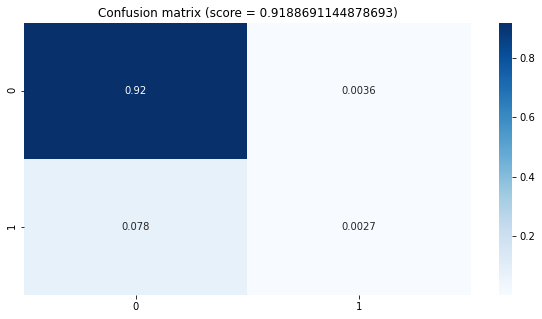

In [50]:
cls.fit(x_fit, y_fit)
pred = cls.predict(X_test)
true = y_test.values
title_hm = 'Confusion matrix (score = {})'.format(
    cls.score(X_test, y_test))
heatmap_print(true, pred, title_hm)

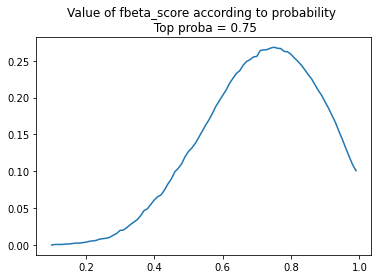

In [51]:
proba_pred = cls.predict_proba(X_test)

fbeta_values = []
range_values = list(range(10, 100))
for proba_range in range_values:
    proba = proba_range / 100
    pred_with_proba = np.apply_along_axis(classify_with_proba, 1, proba_pred, proba_0=proba)
    cm = confusion_matrix(y_test, pred_with_proba)
    fbeta_values += [fbeta_score(y_test, pred_with_proba, beta=0.5)]
fbeta_df = pd.DataFrame(fbeta_values, np.divide(range_values ,100))
proba = fbeta_df.idxmax()[0]
plt.plot(fbeta_df)
plt.title('Value of fbeta_score according to probability \n Top proba = {}'.format(proba))
plt.show()

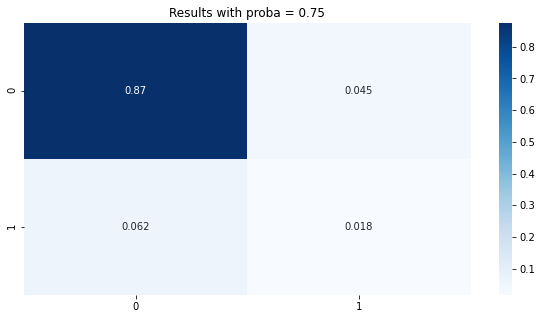

In [52]:
proba_pred = cls.predict_proba(X_test)
pred_with_proba = np.apply_along_axis(classify_with_proba, 1, proba_pred, proba_0=proba)
title_hm = 'Results with proba = {}'.format(proba)
heatmap_print(true, pred_with_proba, title_hm)

##### unsatisfying results

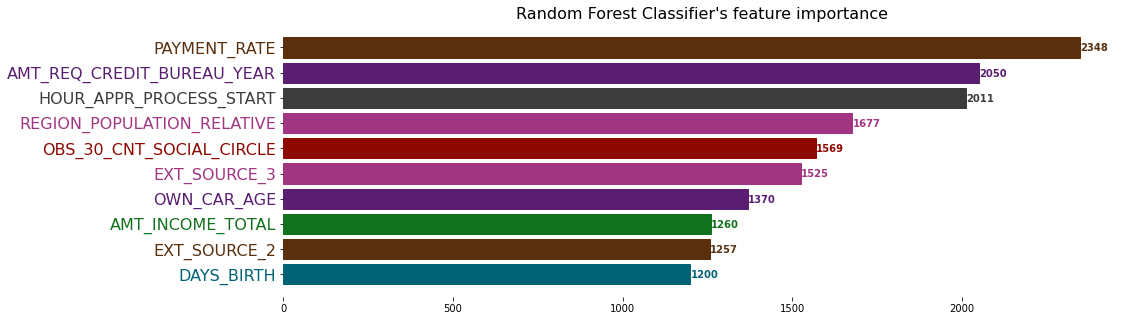

In [53]:
top_x = 10 # Top X importance (top 10 for example)
color_list =  sns.color_palette("dark", len(top_feat)) 
feat_imp = cls.feature_importances_
ind = np.argsort(feat_imp)
ind = ind[-top_x:]
fig, axs = plt.subplots(1,1, figsize=(15, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=0.8)
bars = axs.barh(range(len(ind)), feat_imp[ind], color='b', align='center') 
axs.set_title("Random Forest Classifier's feature importance", fontweight="normal", fontsize=16)
plt.sca(axs)
plt.yticks(range(len(ind)), [top_feat[j] for j in ind], fontweight="normal", fontsize=16)

for i, ticklabel in enumerate(plt.gca().get_yticklabels()):
    ticklabel.set_color(color_list[ind[i]])

for i,bar in enumerate(bars):
    bar.set_color(color_list[ind[i]])

sorted_val_imp = np.around(sorted(cls.feature_importances_), 3)[-top_x:]
for i, v in enumerate(sorted_val_imp):
    axs.text(v+0.001 , i - 0.15, str(v), color=color_list[ind[i]], fontweight='bold')

plt.box(False)

In [67]:
inputer_file_name = r'..\06_MODEL\knn_inputer.sav'
joblib.dump(imputer, inputer_file_name)

['..\\06_MODEL\\knn_inputer.sav']

In [54]:
filename = r'..\06_MODEL\final_model.sav'
joblib.dump(cls, filename)
df_glo[['SK_ID_CURR', 'TARGET'] + top_feat].to_csv(r'..\06_MODEL\all_data.csv', index=False)

In [56]:
f = open(r'..\06_MODEL\parameters.py', 'w')
f.write(
    '"""\nParameter file for api\n"""\n\
from sklearn.preprocessing import MinMaxScaler\n\n\n\
class PredictParams:\n\
    """\n\
    class containing every parameter\n\
    """\n\n\
    def __init__(self):\n\
        self.topfeat = {}\
    '.format(
        top_feat)
)

835